# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Alunos**: 
    Gabriel Martins Silva
    Luiz Eduardo Jacó Andrade

**Matricula**:

**Turma**: 10A

Link do repositório GitHub: https://github.com/SilvaGabrielMartins/GCC_253_EFC_1/blob/main/EFC1_GCC_253_Gabriel_Luiz.ipynb

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 26 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
import sys

sys.setrecursionlimit(1500)

global tempo_exec_merge, cont_merge
tempo_exec_merge = 0
cont_merge = 0

global tempo_exec_heap, cont_heap
tempo_exec_heap = 0
cont_heap = 0

global tempo_exec_quick, cont_quick, cont_quick2
tempo_exec_quick = 0
cont_quick = 0
cont_quick2 = 0

In [2]:
def gera_arranjos_aleatorio(n_elementos):
  arranjo = np.random.randint(5, 1000, (n_elementos))
  return arranjo

In [3]:
def plota(alg, case, nameAlg, title):
  melhor = []
  pior = []
  medio = []
  elem = [i for i in range (5, 1001, 5)]
    
  for i in np.arange(5, 1001, 5):
    arr = gera_arranjos_aleatorio(i)

    arr, tempo, cont3 = alg(arr)
    medio.append(cont3)

    arr, tempo, cont1 = alg(arr)
    melhor.append(cont1)

    arr = arr[::-1]
    arr, tempo, cont2 = alg(arr)
    pior.append(cont2)

  if case == 'todos':
    plt.plot(elem, melhor, label='Crescente')
    plt.plot(elem, pior, label='Decrescente')  
    plt.plot(elem, medio, label='Aleatorio') 
  elif case == 'Crescente':
     plt.plot(elem, melhor, label='%s Crescente' %nameAlg)
  elif case == 'Decrescente':
    plt.plot(elem, pior, label='%s Decrescente' %nameAlg)
  elif case == 'Aleatorio':
     plt.plot(elem, medio, label='%s Aleatorio' %nameAlg)

  plt.xlabel('Quatidade de elementos')
  plt.ylabel('N° de comparações')
  plt.title(title)
  plt.legend()

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [4]:
def insertionSort(arranjo):
  ini= time.time()
  numero_comparacoes = 0
  for j in range (1,len(arranjo)):
    chave=arranjo[j]
    numero_comparacoes += 1
    i=j-1
    while i>=0 and arranjo[i]>chave:
      arranjo[i+1]=arranjo[i]
      i=i-1
      numero_comparacoes += 1
    arranjo[i+1]=chave
  fim = time.time()
  tempo_exec=fim-ini
  return arranjo, tempo_exec, numero_comparacoes 

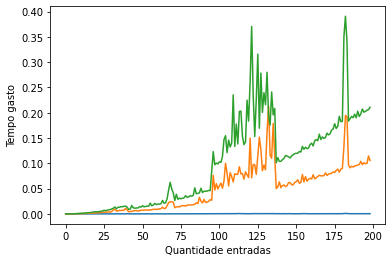

Comparações totais melhor tempo:  99301
Comparações totais pior tempo:  99301


In [5]:
# Algortimo Insertion Sort testado com diferentes entradas:
# n = [5...1000] Passo = 5
array_tempos = []
array_melhores_tempos = []
array_piores_tempos = []
numero_comparacoes_melhor_caso = 0
numero_comparacoes_pior_caso = 0
for n in range(5,1000,5):
  array_inicial = gera_arranjos_aleatorio(n)
  array_melhor_inicial = np.arange(n)
  array_pior_inicial = np.arange(n, 0, -1)
  array_tempos.append(insertionSort(array_inicial)[1])
  numero_comparacoes_melhor_caso += insertionSort(array_melhor_inicial)[2]
  array_melhores_tempos.append(insertionSort(array_melhor_inicial)[1])
  array_piores_tempos.append(insertionSort(array_pior_inicial)[1])
  numero_comparacoes_pior_caso += insertionSort(array_pior_inicial)[2]

plt.plot(array_melhores_tempos, label = 'Melhor tempo')
plt.plot(array_tempos)
plt.plot(array_piores_tempos)
plt.ylabel('Tempo gasto')
plt.xlabel('Quantidade entradas')
plt.show()

print("Comparações totais melhor tempo: ", numero_comparacoes_melhor_caso)
print("Comparações totais pior tempo: ", numero_comparacoes_pior_caso)

##  Merge Sort


In [6]:
def merge(arr, p, q, r):
  global cont_merge
  n1 = q - p + 1
  n2 = r - q
  L = []
  R = []
  for i in range(0, n1):
    L.append(arr[p+i])
  for j in range(0,  n2):
    R.append(arr[q+j+1])

  i = 0
  j = 0
  k = p
  while i < n1 and j < n2:
      cont_merge += 1
      if L[i] <= R[j]:
        cont_merge += 1
        arr[k] = L[i]
        i += 1
      else:
        cont_merge += 1
        arr[k] = R[j]
        j += 1
      k += 1
  while i < n1:
    cont_merge += 1
    arr[k] = L[i]
    i += 1
    k += 1
  while j < n2:
    cont_merge += 1
    arr[k] = R[j]
    j += 1
    k += 1

In [7]:
def mergeSortRec(arr, p, r):
  global tempo_exec_merge, cont_merge
  cont_merge += 1
  ini = time.time()
  if p < r:
    cont_merge += 1
    q = (p+r)//2
    mergeSortRec(arr, p, q)
    mergeSortRec(arr, q+1, r)
    merge(arr, p, q, r)
  fim = time.time()
  tempo_exec_merge += fim - ini
  return arr, tempo_exec_merge, cont_merge

def mergeSort(arr):
  global tempo_exec_merge, cont_merge
  cont_merge = 0
  tempo_exec_merge = 0
  return mergeSortRec(arr, 0, len(arr)-1)


##  Selection Sort


In [8]:
def selectionSort(array):
  ini = time.time()
  cont = 1
  n = len(array)
  for j in range(n):
    menor = j
    cont += 1

    for i in range(j+1,n):
      cont += 1
      if array[i] < array[menor]:
        menor = i
        auxiliar = array[j]
        array[j] = array[menor]
        array[menor] = auxiliar
  fim = time.time()
  tempo_exec = fim - ini
  return array, tempo_exec, cont

##  Bubble Sort


In [9]:
def bubbleSort(arr):
  cont = 1
  ini = time.time()
  for i in range(len(arr)):
    cont += 1
    for j in range(0, len(arr) - i - 1):
      cont += 1
      if arr[j] > arr[j + 1]:
        cont += 1
        arr[j], arr[j+1] = arr[j+1], arr[j]
  fim = time.time()
  tempo_exec = fim - ini
  return arr, tempo_exec, cont

## Heap Sort

In [10]:
def left(i):
  return 2*i + 1

def right(i):
  return (2*i) + 2
  
def maxHeaPify(arr, n, i):
  global cont_heap
  cont_heap += 1
  l = left(i)
  r = right(i)
  maior = i

  if l < n and arr[l] > arr[i]:
    cont_heap += 1
    maior = l
  
  if r < n and arr[r] > arr[maior]:
    cont_heap += 1
    maior = r

  if maior != i:
    cont_heap += 1
    arr[i], arr[maior] = arr[maior], arr[i]
    maxHeaPify(arr, n, maior)

In [11]:
def heapSort(arr):
  global tempo_exec_heap, cont_heap
  tempo_exec_heap = 1
  cont_heap = 1
  ini = time.time()
  n = len(arr)

  for i in range(n // 2 - 1, -1, -1):
    cont_heap += 1
    maxHeaPify(arr, n, i) 
    
  for i in range(n-1, 0, -1):
    cont_heap += 1
    arr[i], arr[0] = arr[0], arr[i]
    maxHeaPify(arr, i, 0)
  fim = time.time()
  tempo_exec_heap += fim - ini
  return arr, tempo_exec_heap, cont_heap

## Quick Sort

> pivo = *A[A-comprimento]*

In [12]:
def partition(l, r, arr):
  global cont_quick
  cont_quick += 1
  pivo, ptr = arr[r], l
  for i in range(l, r):
    cont_quick += 1
    if arr[i] <= pivo:
      cont_quick += 1
      arr[i], arr[ptr] = arr[ptr], arr[i]
      ptr += 1
  arr[ptr], arr[r] = arr[r], arr[ptr]
  return ptr
  
def quicksortRec(l, r, arr):
  global tempo_exec_quick, cont_quick
  cont_quick += 1 
  ini = time.time()
  if l < r:
    cont_quick += 1
    pi = partition(l, r, arr)
    quicksortRec(l, pi-1, arr)  
    quicksortRec(pi+1, r, arr)
  fim = time.time()
  tempo_exec_quick += fim - ini
  return arr, tempo_exec_quick, cont_quick

def quickSort(arr):
  global cont_quick
  cont_quick = 0
  return quicksortRec(0, len(arr)-1, arr)

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [13]:
print("Boa sorte!!!")

Boa sorte!!!


##1. a) c)
###Insertion Sort:
Melhor Caso:O(n) Arranjo Ordenado na ordem crescente<br>
Pior caso: O(n^2) Arranjo Ordenado na ordem decrescente

###Bubble Sort:
Melhor Caso:O(n) Arranjo Ordenado na ordem crescente<br>
Pior caso: O(n^2) Arranjo Ordenado na ordem decrescente

###Selection Sort:
Melhor Caso:O(n^2)<br>
Pior caso: O(n^2)<br>
Eficiência é a mesma para melhor, pior e caso médio

###HeapSort:
Melhor Caso: Θ(n log n)<br>
Pior caso: Θ(n log n)<br>
Eficiência é a mesma para melhor, pior e caso médio

###Quick Sort:
Melhor Caso:O(n^2) Dois Arranjo de tamanho não maior que n/2 <br>
Pior caso: O(n log n) Arranjo Ordenado na ordem crescente<br>
Eficiência é a mesma para melhor e caso médio

###Merge Sort:
Melhor Caso: Θ(n log n)<br>
Pior caso: Θ(n log n)<br>
Eficiência é a mesma para melhor, pior e caso médio

### Insertion Sort

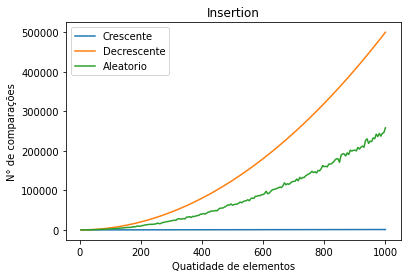

In [14]:
plota(insertionSort, 'todos', 'Insertion', 'Insertion')

### Buble Sort

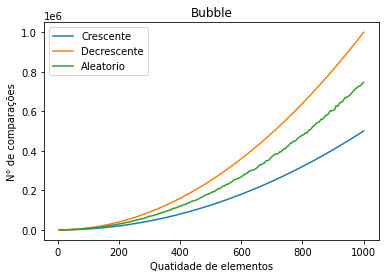

In [15]:
plota(bubbleSort, 'todos', 'Bubble', 'Bubble')

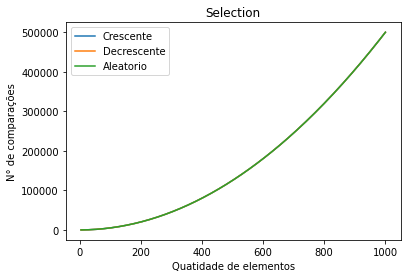

In [16]:
plota(selectionSort, 'todos', 'Selection', 'Selection')

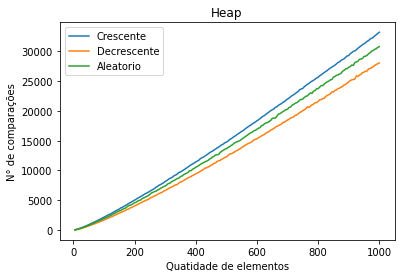

In [17]:
plota(heapSort, 'todos', 'Heap', 'Heap')

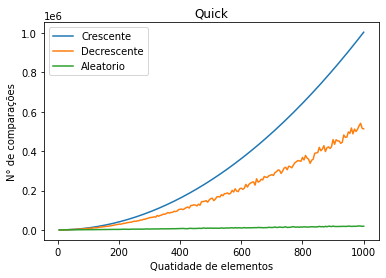

In [18]:
plota(quickSort, 'todos', 'Quick', 'Quick')

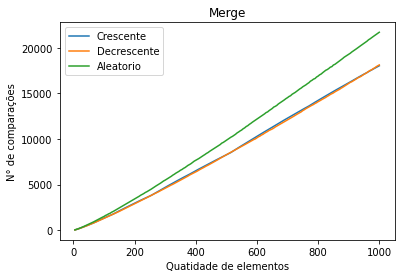

In [19]:
plota(mergeSort, 'todos', 'Merge', 'Merge')

##1. b)

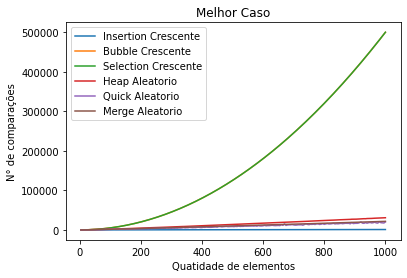

In [ ]:
plota(insertionSort, 'Crescente', 'Insertion', 'Melhor Caso')
plota(bubbleSort, 'Crescente', 'Bubble', 'Melhor Caso')
plota(selectionSort, 'Crescente', 'Selection', 'Melhor Caso')
plota(heapSort, 'Aleatorio', 'Heap', 'Melhor Caso')
plota(quickSort, 'Aleatorio', 'Quick', 'Melhor Caso')
plota(mergeSort, 'Aleatorio', 'Merge', 'Melhor Caso')

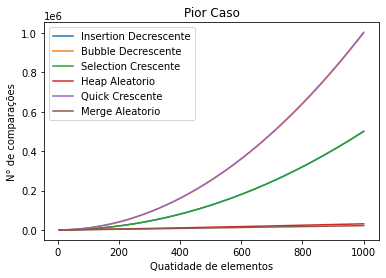

In [21]:
plota(insertionSort, 'Decrescente', 'Insertion', 'Pior Caso')
plota(bubbleSort, 'Decrescente', 'Bubble', 'Pior Caso')
plota(selectionSort, 'Crescente', 'Selection', 'Pior Caso')
plota(heapSort, 'Aleatorio', 'Heap', 'Pior Caso')
plota(quickSort, 'Crescente', 'Quick', 'Pior Caso')
plota(mergeSort, 'Aleatorio', 'Merge', 'Pior Caso')

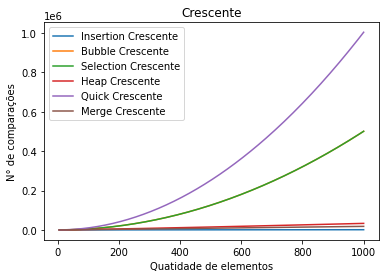

In [22]:
plota(insertionSort, 'Crescente', 'Insertion', 'Crescente')
plota(bubbleSort, 'Crescente', 'Bubble', 'Crescente')
plota(selectionSort, 'Crescente', 'Selection', 'Crescente')
plota(heapSort, 'Crescente', 'Heap', 'Crescente')
plota(quickSort, 'Crescente', 'Quick', 'Crescente')
plota(mergeSort, 'Crescente', 'Merge', 'Crescente')

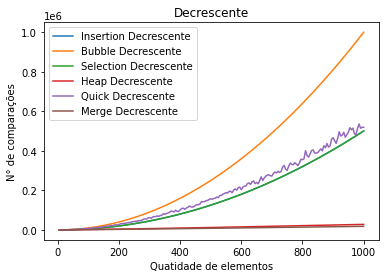

In [23]:
plota(insertionSort, 'Decrescente', 'Insertion', 'Decrescente')
plota(bubbleSort, 'Decrescente', 'Bubble', 'Decrescente')
plota(selectionSort, 'Decrescente', 'Selection', 'Decrescente')
plota(heapSort, 'Decrescente', 'Heap', 'Decrescente')
plota(quickSort, 'Decrescente', 'Quick', 'Decrescente')
plota(mergeSort, 'Decrescente', 'Merge', 'Decrescente')

In [ ]:
plota(insertionSort, 'Aleatorio', 'Insertion', 'Aleatorio')
plota(bubbleSort, 'Aleatorio', 'Bubble', 'Aleatorio')
plota(selectionSort, 'Aleatorio', 'Selection', 'Aleatorio')
plota(heapSort, 'Aleatorio', 'Heap', 'Aleatorio')
plota(quickSort, 'Aleatorio', 'Quick', 'Aleatorio')
plota(mergeSort, 'Aleatorio', 'Merge', 'Aleatorio')

##2)

In [ ]:
def partitionAleatorio(l, r, arr):
  global cont_quick2
  cont_quick2 += 1
  pivo, ptr = random.choice(arr), l
  for i in range(l, r):
    cont_quick2 += 1
    if arr[i] <= pivo:
      cont_quick2 += 1
      arr[i], arr[ptr] = arr[ptr], arr[i]
      ptr += 1
  arr[ptr], arr[r] = arr[r], arr[ptr]
  return ptr
  
def quicksortAleatorioRec(l, r, arr):
  global tempo_exec_quick, cont_quick2
  cont_quick2 += 1 
  ini = time.time()
  if l < r:
    cont_quick2 += 1
    pi = partitionAleatorio(l, r, arr)
    quicksortRec(l, pi-1, arr)  
    quicksortRec(pi+1, r, arr)
  fim = time.time()
  tempo_exec_quick += fim - ini
  return arr, tempo_exec_quick, cont_quick2

def quicksortAleatorio(arr):
  global tempo_exec_quick, cont_quick2
  tempo_exec_quick = 0
  cont_quick2 = 0
  return quicksortAleatorioRec(0, len(arr)-1, arr)

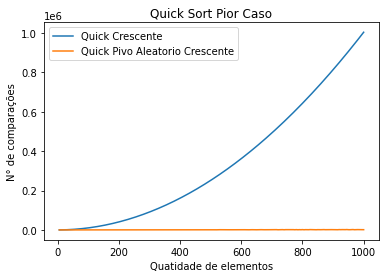

In [26]:
plota(quickSort, 'Crescente', 'Quick', 'Quick Sort Pior Caso')
plota(quicksortAleatorio, 'Crescente', 'Quick Pivo Aleatorio', 'Quick Sort Pior Caso')

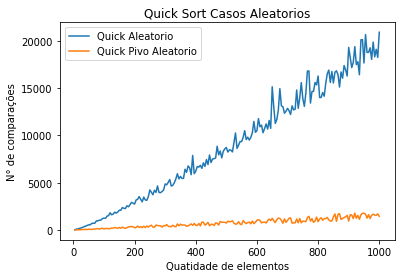

In [27]:
plota(quickSort, 'Aleatorio', 'Quick', 'Quick Sort Casos Aleatorios')
plota(quicksortAleatorio, 'Aleatorio', 'Quick Pivo', 'Quick Sort Casos Aleatorios')


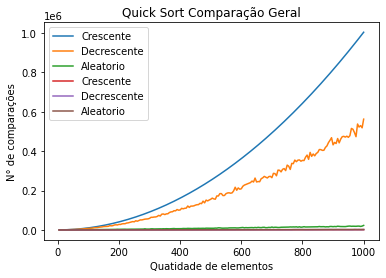

In [28]:
plota(quickSort, 'todos', 'Quick', 'Quick Sort Comparação Geral')
plota(quicksortAleatorio, 'todos', 'Quick Pivo Aleatorio', 'Quick Sort Comparação Geral')